In [13]:
# %matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import textwrap as tw

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Display the data table for preview

city_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [14]:

# Combine the data into a single dataset

#outer merge to match city data with ride data - preserve all lines 

all_data = pd.merge(city_df, ride_df, on="city", how="outer")
all_data.head()


#Get unique types of cities
# all_data["type"].unique()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850



## Bubble Plot of Ride Sharing Data

In [3]:
#break out urban data
urban_data = all_data[all_data["type"] == "Urban"]

#use mean to get avg fare, # of drivers 
urban_mean = urban_data.groupby(["city"]).mean()
urban_mean
#use count to get number of rides 
urban_rides = urban_data.groupby(["city"]).count()["ride_id"]

In [4]:
#break out urban data
suburban_data = all_data[all_data["type"] == "Suburban"]

#use mean to get avg fare, # of drivers 
suburban_mean = suburban_data.groupby(["city"]).mean()

#use count to get number of rides 
suburban_rides = suburban_data.groupby(["city"]).count()["ride_id"]

In [5]:
#break out urban data
rural_data = all_data[all_data["type"] == "Rural"]

#use mean to get avg fare, # of drivers 
rural_mean = rural_data.groupby(["city"]).mean()

#use count to get number of rides 
rural_rides = rural_data.groupby(["city"]).count()["ride_id"]

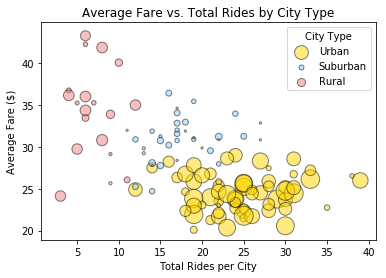

In [19]:

# #THIS IS THE PART THAT JUST GIVES A VANILLA PLoT 

urban_plot = plt.scatter(urban_rides, urban_mean["fare"], marker="o", facecolors="gold", edgecolors="black",
            s=urban_mean["driver_count"]*5, alpha=.5)  

suburban_plot=plt.scatter(suburban_rides, suburban_mean["fare"], marker="o", facecolors="lightskyblue", edgecolors="black",
            s=rural_mean["driver_count"]*5, alpha=.5)  

suburban_plot=plt.scatter(rural_rides, rural_mean["fare"], marker="o", facecolors="lightcoral", edgecolors="black",
            s=suburban_mean["driver_count"]*5, alpha=.5)  

plt.title("Average Fare vs. Total Rides by City Type")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Rides per City")

plt.legend(frameon=True, labels = ["Urban", "Suburban", "Rural"], title="City Type")


plt.savefig("Avg_fare_vs_total_rides.png") 

# #######################


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

bytype_fare = all_data.groupby(["type"]).sum()["fare"]

bytype_faretotals = bytype_fare.sum()

pie_fares =  bytype_fare / bytype_faretotals * 100
pie_fares


# # Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]

fares_pie = pie_fares.plot.pie(figsize = (5,5), colors = colors, autopct="%1.1f%%")
plt.title("Total Fares by City Type")
# # Save Figure

plt.savefig("total_fares_by_city_type.png") 



In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

bytype_rides = all_data.groupby(["type"]).count()["ride_id"]

bytype_totals = bytype_rides.sum()

pie_type =  bytype_rides / bytype_totals * 100

colors = ["gold", "lightskyblue", "lightcoral"]


# # Build Pie Chart

plot = pie_type.plot.pie(figsize = (5, 5),  colors = colors, autopct="%1.1f%%")
plt.title("Total Rides by City Type")

plt.savefig("total_rides_by_city_type.png") 

# Save Figure



In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

bycity_drivers = all_data.drop_duplicates("city")

bytype_drivers = bycity_drivers.groupby(["type"]).sum()["driver_count"]

alltype_drivers = bytype_drivers.sum()

pie_drivers =  bytype_drivers / alltype_drivers * 100
pie_drivers

colors = ["gold", "lightskyblue", "lightcoral"]


drivers_pie = pie_drivers.plot.pie(figsize = (5, 5), colors = colors)
plt.title("Total Drivers by City Type")

# # # Save Figure

plt.savefig("total_drivers_by_city_type.png") 




In [ ]:
# Show Figure
plt.show()